# Homework #6

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [2]:
# Import cell
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 6.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on your _last graded_ homework assignment.  If you got a perfect score, great!  Tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

_Type your answer here using Markdown._

## 6.1 - Factorials, loops, and recursion (12 points)

### Part A (3 points)

The factorial function $n!$ is defined as the product of all numbers from 1 to $n$:

\\[
n! = n \times (n-1) \times (n-2) ... 2 \times 1
\\]

Implement the factorial function as `fact(n)` below, __using a `while` loop.__  The factorial is defined for any non-negative integer, including zero ($0! = 1$); _make sure your code handles this edge case properly._  (Don't be afraid to add your own test!)

(I've included some assertions to enforce the requirement that $n$ is a non-negative integer.  The function would work fine without them; the assertions are there to make sure nobody gets unexpected behavior.  The factorial _can_ be defined for negative integers and even for decimal or complex numbers, but our function doesn't do those correctly, so better to cause an error than give a wrong answer!)

In [3]:
def fact(n):
    """
    Return the factorial n!.
    
    n must be a non-negative integer.
    """
    
    # Factorial is defined for non-negative integers only.
    assert type(n) == int
    assert n >= 0
    
    
    ### BEGIN SOLUTION
    fact = 1
    i = 2
    while i <= n:
        fact *= i
        i += 1
        
    return fact  
    ### END SOLUTION
    
    

print(fact(30))

265252859812191058636308480000000


In [4]:
assert fact(2) == 2
assert fact(5) == 120
assert fact(1) == 1

### Part B (3 points)

A less familiar but related function is the __double factorial__ or __semifactorial__, $n!!$, which is defined just like the factorial but uses every _other_ number in the product:

\\[
n!! = \begin{cases}
n \times (n-2) \times (n-4) ... \times 3 \times 1, & (n\ {\rm odd}); \\
n \times (n-2) \times (n-4) ... \times 4 \times 2, & (n\ {\rm even}); \\
\end{cases}
\\]

__Implement the double factorial function `double_fact(n)` below__, again __using a `while` loop.__  Once again, assume $n$ is a non-negative integer, and make sure you reproduce the special case $0!! = 1$.



In [5]:
def double_fact(n):
    """
    Return the 'double factorial' n!!.
    
    n must be a non-negative integer.
    """
    
    assert type(n) == int
    assert n >= 0
    
    ### BEGIN SOLUTION
    if n == 0:
        return 1

    if (n % 2) == 0:
        dfact = 2
    else:
        dfact = 1
        
    # n!! starts with either 2*4 or 1*3
    ii = dfact + 2
    
    while ii <= n:
        dfact *= ii
        ii += 2
        
    return dfact
        
    ### END SOLUTION
    
    
    

In [6]:
assert double_fact(0) == 1
assert double_fact(7) == 105
assert double_fact(4) == 8

### Part C (3 points)

As we've seen a few times, function definitions in Python aren't limited to simple statements; we can also call _other_ functions from inside a function.  In fact, it is valid Python to _call the function we are defining from inside itself!_  When the definition of a function includes the function itself, the function is said to be __recursive__.

Recursion is well-suited to simplifying certain problems, and is a powerful technique that you should know about!  The factorial is particularly easy to implement with recursion, since it satisfies the identity

\\[
n! = n \times (n-1)!
\\]

which leads to the following simple implementation:


In [9]:
def recursive_fact(n):
    if n <= 1:
        return 1
    
    return n * recursive_fact(n-1)

print(recursive_fact(113) == fact(113))
print(recursive_fact(1) == fact(1))
print(recursive_fact(0) == fact(0))

True
True
True


Think about the execution: when you call `recursive_fact(n)`, __which numbers does the computer multiply together first?__  Is it `2*1`, or `n*(n-1)`?  __Explain your reasoning!__

_(Hint: try to follow the code through explicitly for a modest value of `n`, say 4.  It's hard to use `print` to diagnose what's happening, but the Python Tutor may help.)_

__Python has to evaluate the function in `n * recursive_fact(n-1)`, before it can actually multiply anything!  (If you add print statements, you'll see the function is called in `recursive_fact(4)` for 4, then 3, then 2, then finally 1.)__

__So, the function recurses until 1 is returned, and then starts multiplying: `recursive_fact(2)` returns `2*1`, `recursive_fact(3)` returns `3 * recursive_fact(2) = 3 * 2 = 6`, and so on.  The `2*1` happens first!__

There are some drawbacks to recursion; for one thing, recursion is simply slower than iteration in Python, as the usage of memory piles up with every layer of recursion.  (Of course, both functions still take microseconds to run, so maybe the trade-off is worth it for a clearer implementation in this case!)  

Recursion also gives us another way to generate an infinite loop in principle, if we're not careful about termination of the recursive function calls.  (In practice, Python has a __recursion limit__, so if a function calls itself too many times the kernel will simply give an error.)

### Part D (3 points)

Now, your turn: __implement the double factorial $n!!$ using recursion.__  (Your answer should be much shorter than the iterative one above!)

In [7]:
def rec_double_fact(n):
    
    ### BEGIN SOLUTION
    if n <= 1:
        return 1

    return n * rec_double_fact(n-2)
    ### END SOLUTION
    

In [8]:
assert rec_double_fact(0) == 1
assert rec_double_fact(11) == 10395
assert rec_double_fact(18) == 185794560

## 6.2 - Debugging and Fizzbuzz (12 points)

There are a lot of ways to solve the famous FizzBuzz programming problem (see the worked example on tutorial 11.)  Here are a few alternative solutions.  The only problem is, they all have some bugs in them!  __Debug the code examples__ so that they correctly produce the FizzBuzz sequence from 1 to 30.

_(Note: you should fix the code examples, but make sure you use the same basic algorithm to produce the sequence.  In other words, you can't just copy/paste the solution to tutorial 11 three times to get this problem right!)_

### Part A

The first solution uses three different `%` tests for 3, 5, and 15.

In [ ]:
## Read-only code cell: give your solution in the next cell below.

i = 1
while i <= 30:
    if (i % 3) == 0:
        print('Fizz')
    elif (i % 5) == 0:
        print('Buzz')
    elif (i % 15) == 0:
        print('FizzBuzz')
    else:
        print(i)
    
    i += 1

In [10]:
# The code above almost works, but prints 'Fizz' instead of 'FizzBuzz' for 15 and 30.
# The problem is the ordering of the 'if' branches: we need to test for division by 15 first,
# since those numbers are also divisible by 3 and 5.  Re-ordering the branches will fix the code.

i = 1
while i <= 30:
    if (i % 15) == 0:
        print('FizzBuzz')
    elif (i % 3) == 0:
        print('Fizz')
    elif (i % 5) == 0:
        print('Buzz')
    else:
        print(i)
    
    i += 1

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz


### Part B

This method uses a pair of "counter" variables to find multiples of 3 and 5 without the use of the `%` operator.

In [ ]:
## Read-only code cell: give your solution in the next cell below.

i = 1
fizz_count=0
buzz_count=0
while i <= 30:
    s = ''
    fizz_count += 1
    buzz_count += 1
    if fizz_count == 3:
        s += 'Fizz'
        fizz_count = 1
    if buzz_count == 5:
        s += 'Buzz'
        buzz_count = 1
    
    if s == '':
        print(i)
    else:
        print(s)
        
    i += 1

In [11]:
# The idea of using counters is fine, but they are being reset incorrectly:
# after the initial few numbers, "Fizz" appears every 2 numbers and "Buzz" every 4.
# Resetting the counters to 0 instead of 1 inside the loop will fix the code.

i = 1
fizz_count=0
buzz_count=0
while i <= 30:
    s = ''
    fizz_count += 1
    buzz_count += 1
    if fizz_count == 3:
        s += 'Fizz'
        fizz_count = 0
    if buzz_count == 5:
        s += 'Buzz'
        buzz_count = 0
    
    if s == '':
        print(i)
    else:
        print(s)
        
    i += 1

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz


### Part C

Finally, here's an attempt using NumPy arrays and masks to implement FizzBuzz.

In [ ]:
## Read-only code cell: give your solution in the next cell below.

all_numbers = np.arange(0,30)

div_3_mask = all_numbers % 3
div_5_mask = all_numbers % 5

all_numbers = np.array(all_numbers, np.unicode)
all_numbers[div_3_mask] = 'Fizz'
all_numbers[div_5_mask] = 'Buzz'
all_numbers[np.logical_and(div_3_mask, div_5_mask)] = 'FizzBuzz'

print(all_numbers)

In [12]:
# The Fizz and Buzz masks are backwards: they're masking numbers that
# aren't multiples of 3 and 5!  Also, the np.arange is off by one;
# it should go from 1 to 31 (so it ends including 30.)

all_numbers = np.arange(1,31)

div_3_mask = all_numbers % 3 == 0
div_5_mask = all_numbers % 5 == 0

all_numbers = np.array(all_numbers, np.unicode)
all_numbers[div_3_mask] = 'Fizz'
all_numbers[div_5_mask] = 'Buzz'
all_numbers[np.logical_and(div_3_mask, div_5_mask)] = 'FizzBuzz'

print(all_numbers)

['1' '2' 'Fizz' '4' 'Buzz' 'Fizz' '7' '8' 'Fizz' 'Buzz' '11' 'Fizz' '13'
 '14' 'FizzBuzz' '16' '17' 'Fizz' '19' 'Buzz' 'Fizz' '22' '23' 'Fizz'
 'Buzz' '26' 'Fizz' '28' '29' 'FizzBuzz']


## 6.3 - Spring equilibrium beyond Hooke's law (10 points)

Hooke's law states that the force exerted by a spring is proportional to the distance $x$ by which it is extended, $F = -kx$, where $k$ is the spring constant.  Equivalently, the potential energy $U$ stored in a stretched spring is equal to

\\[
U(x) = \frac{1}{2} kx^2.
\\]

However, Hooke's law only holds if $x$ is relatively small; a spring stretched sufficiently far will begin to show a _non-linear response_, i.e. the force will deviate from $F = -kx$.  The details of how the spring's behavior changes depends on its material and construction, but we can consider a simple model based on a quartic potential energy:

\\[
U(x) = \frac{1}{2} kx^2 - p x^3 + q x^4
\\]
where $p$ and $q$ are positive constants.  (Notice the energy is __not symmetric about $x=0$__; we're modeling only the behavior at positive $x$, i.e. for a stretched spring.  In general we might expect a spring to respond differently to extreme stretching and extreme compression.)

Let's take some concrete numerical values: for simplicity we'll set $k = 1\ N/m$, and then take $p = 0.7\ N/m^2$ and $q = 0.25\ N/m^3$.  The first term (Hooke's law) is a good approximation to the behavior of the spring up to about 10 cm away from $x=0$, and then the potential energy becomes significantly different.

__Run the cell below__ to make a plot of $U(x)$, so you can get a sense for what's going on.  Remember, Hooke's law should give a quadratic potential; you can see that the potential _does_ look parabolic if you get close enough to $x=0$.

(0, 0.4)

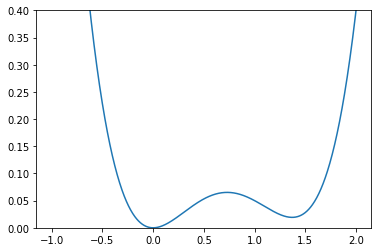

In [13]:
def U(x):
    k = 1  # N/m
    p = 0.7  # N/m^2
    q = 0.25  # N/m^3
    
    return 0.5 * k * x**2 - p*x**3 + q*x**4

x = np.linspace(-1,2,1000)
plt.plot(x, U(x))
plt.ylim(0,0.4)

### Part A (3 points)

__Implement the negative derivative of potential energy -U'(x)__, which is equal to the net force, as `net_force(x)` below.  We'll keep the numerical spring constants all fixed for this problem, so $x$ should be the only argument to your function.  (You can copy the values of k,p,q from the plotting cell above.)

In [14]:
def net_force(x):
    ### BEGIN SOLUTION
    k = 1    # N / m
    p = 0.7  # N / m^2
    q = 0.25  # N / m^3
    
    # U'(x) is the derivative from above:
    # U'(x) = k*x - 3*p*x^2 + 4*q*x^3.
    # Net force is -U'(x).
    
    return -k * x + 3 * p * x**2 - 4 * q * x**3
    ### END SOLUTION
    
    
    
    

In [15]:
import numpy.testing as npt

npt.assert_allclose(net_force(0), 0.)
npt.assert_allclose(net_force(0.65), -0.0374, atol=1e-4)
npt.assert_allclose(net_force(0.44), -0.1186, atol=1e-4)

### Part B (7 points)

Now we'd like to find the _points of equilibrium_ $x_0$, where the spring will remain at rest.  In addition to the obvious equilibrium point at $x=0$, for the numerical values chosen there are _two more_ points of equilibrium at positive $x$.  (Convince yourself from the plot of $U(x)$ that this is true, or make a plot of the net force!)

__Find the two non-zero points of equilibrium__ for this system (in meters), and save them in the variables `x0_A` and `x0_B` below; it doesn't matter which root you store in which variable.  

This is a root-finding problem using the `net_force()` function you implemented above.  There are two ways you may approach this problem:

1. Copy your implementation of the bisection root finder from tutorial 8 into this notebook, and use that;
2. Use one of the root-finding algorithms from the `scipy.optimize` module.  I won't give you help here, it's up to you to [read the scipy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) and figure out how to use an appropriate algorithm!

A good way to check what you're doing is to make sure you can numerically locate the equilibrium point at $x=0$ before you proceed to the other two.  

_(Note: of course, there are analytic ways to find the roots in this case, which you can use to check your answer if you like.  But you won't get any credit for your answer unless you have a complete Python solution here!)_

In [16]:
# Put your bisection algorithm here, or use this cell
# to import what you need from the scipy module.

### BEGIN SOLUTION

# I'll import the bisection search from scipy.optimize, which works similarly to the one we wrote,
# so that my answer will be useful no matter which way you solved this.

from scipy.optimize import bisect

### END SOLUTION


In [17]:
# Save the points of equilibrium you find in the two variables below!
x0_A = 0
x0_B = 0

### BEGIN SOLUTION
# Make sure we find the equilibrium at zero:

x0_0 = bisect(net_force, -0.2, 0.2)
print(x0_0)

# Using the plot above, or a plot of net_force(x),
# we can find good intervals to do bisection on!

x0_A = bisect(net_force, 0.5, 1.0)
print(x0_A)

x0_B = bisect(net_force, 1.2, 2.0)
print(x0_B)

### END SOLUTION



0.0
0.7298437881272548
1.3701562118701993


In [ ]:
## Hidden tests in this cell; do not remove or you may get a zero for this problem!


## 6.4 - Intro to TeX math notation (14 points)

All the way back in lecture 1, I told you that we'd be meeting not just Markdown, but a way to write math equations inside Jupyter Markdown blocks called __MathJax__.  Well, now is the time!

MathJax is a tool that implements the widely-used __TeX math notation__.  "TeX" (pronounced like "tek") is a typesetting language used to make PDF files: it's the gold standard for writing scientific papers.  In its full glory, TeX is a complete markup langauge which is significantly more complicated than Markdown.  MathJax just borrows the math notation, and lets us use it alongside Markdown - the best of both worlds!

You can even use it in things like legends and labels for PyPlot, as in the cell above!  For PyPlot, _an extra `\` appears in all TeX commands that use one_  (this is due to `\` being an "escape character" for PyPlot itself.)

Having both Markdown and TeX math available lets you make complete, self-contained Jupyter notebooks for projects - like every lecture and assignment you've seen in the class so far.

This cell shows the notation for MathJax inside Jupyter.  We can write both __in-line math__, which appears as part of some other text, or __stand-alone equations__ which are separated out.  In-line math looks like this: $a^2 + b^2 = c^2$, and is denoted by surrounding our math with the dollar `$` character.  Stand-alone equations look like this:

$$
\int_0^1 x = \frac{1}{2}
$$

and are denoted by a _pair_ of dollar signs, `$$`.  (There's another way to write blocks with square brackets that I use by habit, but they're the same.  Click on any of my math cells above to see examples.)  

__Double-click on this cell to see what's inside!__




The _next_ cell shows a table of common TeX commands and how they appear.  There's a [nice and somewhat more complete list on StackExchange here](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).

Basically:
* Regular letters and math symbols like `+`, `-`, `/` are all drawn nicely.
* TeX commands are denoted by a backslash, i.e. as `\command`.  These draw special symbols like $\zeta$, names of special functions like $\sin$, and things like integrals, fractions, sums...
* TeX uses curly braces `{`,`}` to group things together: this tells it the difference between $10^10$ and $10^{10}$.

Even I don't know all of the TeX special commands!  If you're looking for the TeX to draw something specific, [DeTeXify](http://detexify.kirelabs.org/classify.html) will let you draw it and try to guess what command you're looking for!

| Symbol | TeX command | Example |
|--------|-------------|---------|
| superscript  |  `^`        |   $x^2$   |
| subscript |  `_`      |  $x_i$  |
| symbols  | `\alpha, \beta, \Gamma...` | $\alpha$, $\beta$, $\Gamma$ |
| more symbols| `\infty, \lt, \gt, \cdot , \rightarrow...` | $\infty, \lt, \gt, \cdot, \rightarrow$ |
| special funcs | `\sin, \log, \lim...` | $\sin(x)$, $\log(y)$, $\lim_{x \rightarrow 0}$ |
| groups   | `{...}`    |  $10^10$ (wrong) vs. $10^{10}$ (grouped!) |
| fraction | `\frac{a}{b}` |  $\frac{3}{4}$  |
| integral | `\int_{a}^{b}` |  $\int_{-1}^{1}$ |
| derivative | `\frac{dy}{dx}` | $\frac{dy}{dx}$ |
| sum  | `\sum_{a}^{b}`    | $\sum_{x=1}^{10}$ |
| big brackets | `\left(...\right)`  | $( \frac{3}{4})$ (small) vs. $\left( \frac{3}{4} \right)$ (big!) |
| radicals  | `\sqrt{...}`  | $\sqrt{3}$ or $\sqrt[4]{4}$ |
| accents and fonts | `\vec{x}, \mathbf{y}, \hat{z}...` | $\vec{x}, \mathbf{y}, \hat{z}$ |
| text inside math | `\textrm{some text}` | $x_{\textrm{long text label}}$ |

### Part A (8 points)

__Write all of the following formulas out in TeX in the cell below:__ use the variable names as described!

* __The Pythagorean theorem:__ the sum of squares of two sides $a$ and $b$ of a right triangle equals the square of the length of the hypotenuse $c$.
* __Newton's second law:__ in one dimension, force $F$ is equal to mass $m$ times the second derivative of position  $x$ with respect to time $t$.
* __Simple integration:__ the integral of the function 1/x from 1 to 2 is equal to the logarithm of 2.
* __The quadratic formula:__ solutions to the quadratic equation $ax^2 + bx + c = 0$ are minus b, plus or minus the square root of b squared minus 4 times a times c, all divided by 2 times a.

* __Pythagorean theorem:__

$$
a^2 + b^2 = c^2
$$

* __Newton's second law:__

$$
F = m \frac{d^2x}{dt^2}
$$

* __A simple integral:__

$$
\int_1^2 dx\ \frac{1}{x} = \log(2)
$$

* __The quadratic formula:__

$$
ax^2 + bx + c = 0 \Rightarrow x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

__(You only had to write the formula itself, but I thought I'd show writing both and using `\Rightarrow`.)__

### Part B (6 points)

Now let's put what you know together: in the final cell below, __pick your favorite physics or math equation__ (not on the list you just did), write it out in TeX notation, and then _describe it briefly using Markdown._

__I like Euler's formula, myself:__

$$
e^{i\pi} + 1 = 0
$$

__All of the five most important numbers in math, together in one equation at last!__